<p align="center">
  <a href="url"><img src="https://images.unsplash.com/photo-1507720708252-1ddeb1dbff34?ixlib=rb-1.2.1&auto=format&fit=crop&w=1668&q=80" align="middle" height="383" width="640" ></a>
</p>

# 10 Minutes to Building a Fully-Connected Image Classifier

#### *Author: Binh Phan*

In this tutorial, you will train a fully-connected neural network to perform image classification on dandelions and grass. We will be using TensorFlow/Keras to build our neural network and training/validation dataset. First, let's download the training and validation data:

### Building the Image Dataset

The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data.

Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [1]:
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt


#### Data Preprocessing

Now, let's use `keras.preprocessing.image.ImageDataGenerator` class to create our train and validation dataset and normalize our data.

It's important to normalize our data because data going into our CNN to improve its overall performance. We will use the `rescale` parameter to scale our image pixel values from [0, 255] to [0,1].

In each generator, we specify the source directory of our images, the classes, the input image size, the batch size (how many images to process at once), and class mode.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## generate data

In [4]:
import numpy as np
MAXSHAPE = 30
def fill40(arr: np.array):
    padded = np.zeros((MAXSHAPE, MAXSHAPE), dtype=arr.dtype)
    padded[:arr.shape[0], :arr.shape[1]] = arr[:, :MAXSHAPE]
    return padded

In [24]:
import glob, random, os
import pandas as pd
# file_list = glob.glob("/content/drive/MyDrive/centroset/set30.5/*.csv")
file_list = glob.glob("G:\My Drive\centroset\set30.5\*.csv")
# random.shuffle(file_list)
X = []
y = []
for csv in file_list:
    print(f"reading {csv}")
    # the X
    df = pd.read_csv(csv, index_col="Unnamed: 0")
    X.append(fill40(df.values))
    # the y
    if os.path.basename(csv).startswith("normal"):
        y.append(0)
    else:
        y.append(1)


# y = [0 if f.startswith("normal") else 1 for f in map(os.path.basename, file_list)]

reading G:\My Drive\centroset\set30.5\normal-1-s0-1.csv
reading G:\My Drive\centroset\set30.5\normal-1-s0-2.csv
reading G:\My Drive\centroset\set30.5\normal-1-s0-3.csv
reading G:\My Drive\centroset\set30.5\normal-1-s0-4.csv
reading G:\My Drive\centroset\set30.5\normal-1-s0-5.csv
reading G:\My Drive\centroset\set30.5\normal-1-s0-6.csv
reading G:\My Drive\centroset\set30.5\normal-1-s0-7.csv
reading G:\My Drive\centroset\set30.5\normal-1-s0-8.csv
reading G:\My Drive\centroset\set30.5\normal-1-s0-9.csv
reading G:\My Drive\centroset\set30.5\normal-1-s0-10.csv
reading G:\My Drive\centroset\set30.5\normal-1-s0-11.csv
reading G:\My Drive\centroset\set30.5\normal-2-s0-1.csv
reading G:\My Drive\centroset\set30.5\normal-2-s0-2.csv
reading G:\My Drive\centroset\set30.5\normal-2-s0-3.csv
reading G:\My Drive\centroset\set30.5\normal-2-s0-4.csv
reading G:\My Drive\centroset\set30.5\normal-2-s0-5.csv
reading G:\My Drive\centroset\set30.5\normal-2-s0-6.csv
reading G:\My Drive\centroset\set30.5\normal-2

In [25]:
y.count(1)

27

In [26]:
X_train,  X_val, y_train, y_val = train_test_split(np.array(X), np.array(y), random_state=5, stratify=y)

In [27]:
y_val.tolist().count(1)

7

## Building the Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [7]:
import tensorflow as tf
import numpy as np
#from itertools import cycle

#from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import label_binarize
#from sklearn.multiclass import OneVsRestClassifier
#from scipy import interp
#from sklearn.metrics import roc_auc_score

Let's then add a Flatten layer that flattens the input image, which then feeds into the next layer, a Dense layer, or fully-connected layer, with 128 hidden units. Finally, because our goal is to perform binary classification, our final layer will be a sigmoid, so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is of class 1 (class 1 being grass and class 0 being dandelion).

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (30, 30)),
                                    tf.keras.layers.Dense(16, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu, input_shape=(30, 30, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(input_shape = (30, 30)),
    # tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    # tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ], name="Anbev_CNN")
model.summary()

Model: "Anbev_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 2, 2, 128)         0 

The "output shape" column shows the transformation of the dimensions of each layer as a result of the convolution and max pooling - convolution will reduce the layer size by a bit due to padding, and max pooling will halve the output size.

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss. We will use the `Adam` optimizer. [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) is a sensible optimization algorithm because it automates learning-rate tuning for us (alternatively, we could also use [RMSProp](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) or [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad) for similar results). We will add accuracy to `metrics` so that the model will monitor accuracy during training

In [44]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

### Training
Let's train for 15 epochs.

Note that steps_per_epoch was set along with batch_size in ImageDataGenerator so that steps_per_epoch * batch_size = total # of images. For example, for training, 8 * 120 = 960, just under our total of 999 images.

Notice that as we train, our validation accuracy never exceeds training accuracy, which is a good thing. Our model won't work better on unseen images than seen images.

In [31]:
X_train = X_train.reshape(-1, 30, 30, 1)
X_val = X_val.reshape(-1, 30, 30, 1)

In [ ]:
X_train = np.array(X).reshape(-1, 30, 30, 1)
y_train = np.array(y)

In [ ]:
len(X_train)

In [46]:
# history = model.fit(
#       train_generator,
#       steps_per_epoch=8,
#       epochs=15,
#       verbose=1,
#       validation_data = validation_generator,
#       validation_steps=8)

history = model.fit(x=X_train,
      y=y_train,
      steps_per_epoch=4,
      batch_size=26,
      epochs=15,
      verbose=1,
      validation_data=(X_val, y_val),
      shuffle=True
      )

Epoch 1/15
4/4 [==============================] - 0s 51ms/step - loss: 0.2922 - accuracy: 0.8155 - val_loss: 0.4102 - val_accuracy: 0.8000
Epoch 2/15
4/4 [==============================] - 0s 39ms/step - loss: 0.2651 - accuracy: 0.8641 - val_loss: 0.4208 - val_accuracy: 0.8000
Epoch 3/15
4/4 [==============================] - 0s 51ms/step - loss: 0.2422 - accuracy: 0.8641 - val_loss: 0.4295 - val_accuracy: 0.8000
Epoch 4/15
4/4 [==============================] - 0s 39ms/step - loss: 0.2153 - accuracy: 0.9320 - val_loss: 0.4343 - val_accuracy: 0.8000
Epoch 5/15
4/4 [==============================] - 0s 53ms/step - loss: 0.1918 - accuracy: 0.9320 - val_loss: 0.4518 - val_accuracy: 0.8286
Epoch 6/15
4/4 [==============================] - 0s 53ms/step - loss: 0.1652 - accuracy: 0.9417 - val_loss: 0.4519 - val_accuracy: 0.8286
Epoch 7/15
4/4 [==============================] - 0s 55ms/step - loss: 0.1417 - accuracy: 0.9612 - val_loss: 0.4588 - val_accuracy: 0.8571
Epoch 8/15
4/4 [===========

## Accuracy, ROC Curve, and AUC

Let's evaluate the accuracy of our model:

In [65]:
model.evaluate(X_val, y_val, verbose=1)

2/2 [==============================] - 0s 10ms/step - loss: 0.3174 - accuracy: 0.9211


[0.31739145517349243, 0.9210526347160339]

Now, let's calculate our ROC curve and plot it.

First, let's make predictions on our validation set. When using generators to make predictions, we must first turn off shuffle (as we did when we created validation_generator) and reset the generator:

In [66]:
preds = model.predict(X_val,
                      verbose=1)

2/2 [==============================] - 0s 6ms/step


In [ ]:
np.hstack(preds)

In [ ]:
np.hstack(preds).round(2)

In [67]:
flatPreds = np.hstack(preds)
for a, b, c in zip(flatPreds.round(2), np.where(flatPreds < 0.3, 0, 1), y_val):
    print(f"{a:.2f} {b} {c}")

0.39 1 0
1.00 1 1
1.00 1 1
1.00 1 1
0.49 1 0
0.00 0 0
0.08 0 0
1.00 1 1
0.00 0 0
0.49 1 1
0.00 0 0
0.01 0 0
0.99 1 1
1.00 1 1
0.00 0 0
0.00 0 0
0.37 1 0
0.00 0 0
0.21 0 0
1.00 1 1
0.56 1 1
0.55 1 0
0.01 0 0
0.09 0 0
0.01 0 0
0.05 0 0
0.13 0 0
0.92 1 1
0.00 0 0
0.40 1 0
0.01 0 0
0.42 1 0
0.00 0 0
0.00 0 0
0.00 0 0
0.01 0 0
1.00 1 0
0.39 1 0


In [ ]:
y_val

To create the ROC curve and AUC, we'll need to compute the false-positive rate and the true-positive rate:

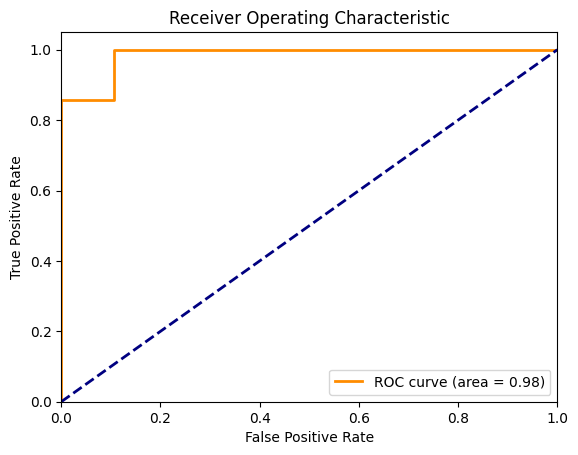

In [44]:
fpr, tpr, _ = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve is a probability curve plotting the true-positive rate (TPR) against the false-positive rate (FPR). In this curve, the diagonal line is the curve for random guessing, e.g. coin flipping, so the ROC curve above shows that our model does better than chance at classifying between dandelions and grass. Not bad!

Similarly, the AUC (area under curve), as shown in the legend above, measures how much our model is capable of distinguishing between our two classes, dandelions and grass. The higher the AUC, the better our model is at classification. It is also used to compare different models, which I will do in future tutorials when I present how to build an image classifier using Convolutional Neural Networks and transfer learning with ResNet!

## Making Predictions

Now, let's use the model to make predictions! Upload an image to see if it's a dandelion or grass.

In [ ]:
for _ in range(15):
    i = random.randint(0, len(X)-1)
    pred = model.predict(np.array([X[i]]).reshape(1,30,30,1))
    pred = pred.round().astype(int)[0,0]
    print(f"index: {i} pred: {pred}, label: {y[i]}")

In [ ]:
#save model
model.save("/content/drive/MyDrive/anbev-cnn-fix.keras")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a dandelion")
  else:
    print(fn + " is a grass")


In [2]:
import glob, math, os
import pandas as pd

def visualize(setpath, shape, sampling, step, cmap="viridis", size=(15, 15), filter=None):
    dir = f"{setpath}/set{shape}.{sampling}/"
    assert os.path.isdir(dir), f"Directory {dir} dont exist"
    if step == "all":
        csv_files = glob.glob(f"{dir}/*.csv")
    elif filter:
        csv_files = glob.glob(f"{dir}/*{filter}*.csv")
    else:
        csv_files = glob.glob(f"{dir}/*s{step}*.csv")
    data_list = []
    for csv in csv_files:
        df = pd.read_csv(csv, index_col="Unnamed: 0")
        data_list.append(fill40(df.values))

    # Create a 4x4 grid to display the arrays
    num_rows, num_cols = [math.ceil(math.sqrt(len(csv_files)))]*2

    fig, axs = plt.subplots(num_rows, num_cols, figsize=size)

    # Iterate over the arrays and plot them in the grid
    for i in range(num_rows):
        for j in range(num_cols):
            # Calculate the index in the data_list based on the row and column
            index = i * num_cols + j
            if index < len(data_list):
                axs[i, j].imshow(data_list[index], cmap=cmap)
                axs[i, j].set_title(os.path.basename(csv_files[index]))
            axs[i, j].axis('off')

    # Adjust the spacing between the subplots
    #plt.subplots_adjust(wspace=0.05, hspace=0.3)
    fig.suptitle(f"Data for shape ({shape}) sample ({sampling}) step ({step})", fontsize=15)
    plt.tight_layout()
    # Show the grid of images
    plt.show()

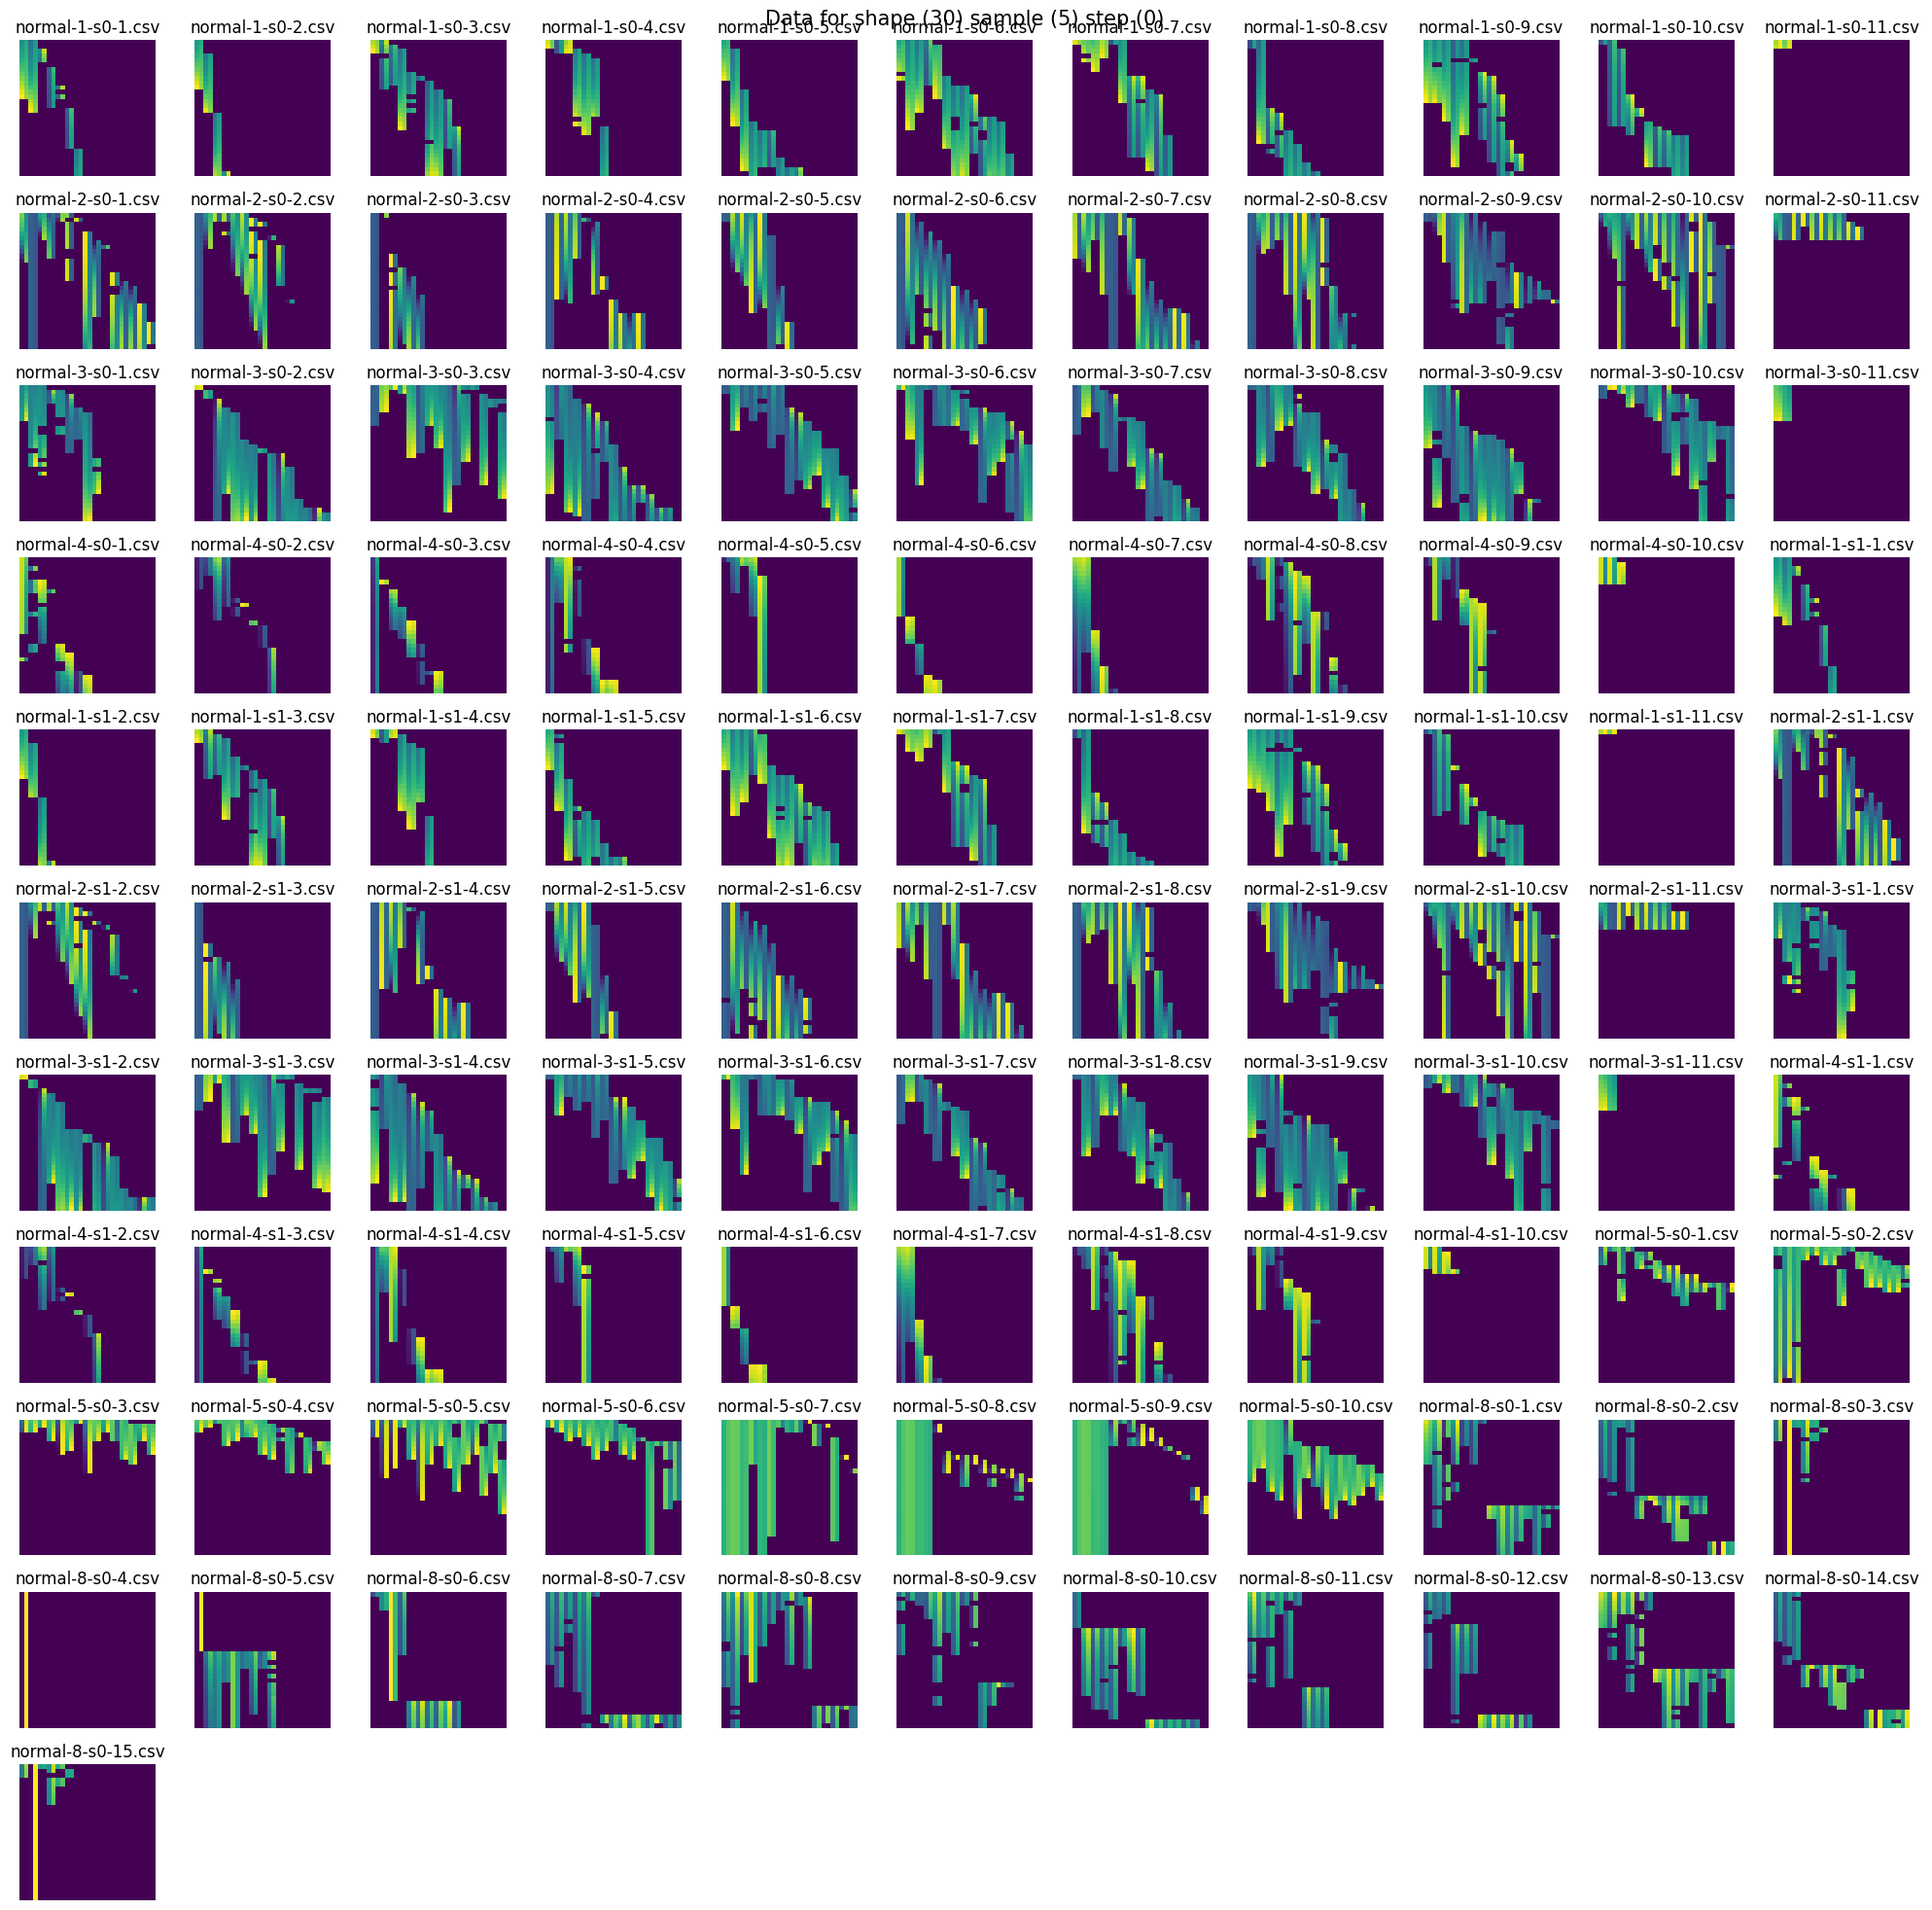

In [69]:
visualize("G:\My Drive\centroset", 30, 5, 0, cmap="viridis", size=(20, 20), filter="normal")

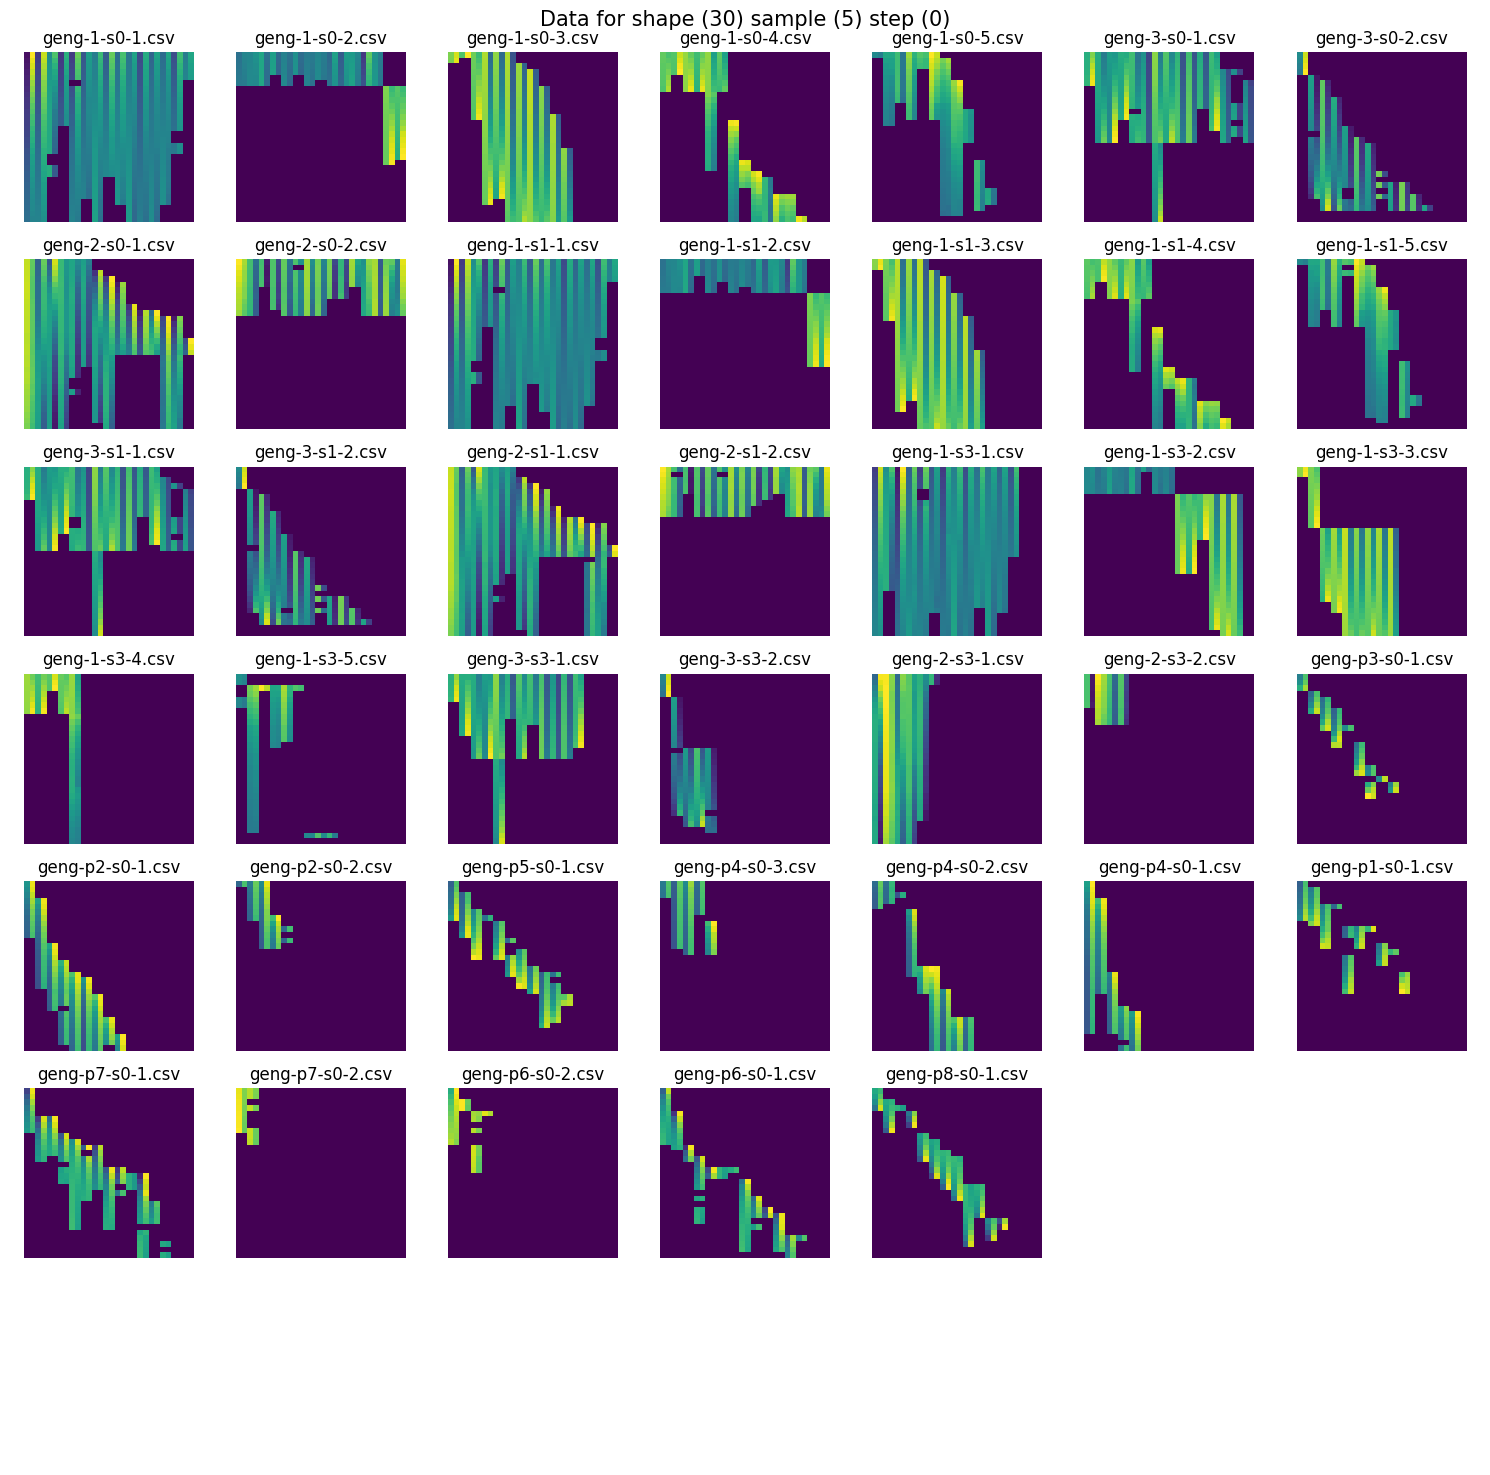

In [7]:
visualize("G:\My Drive\centroset", 30, 5, 0, cmap="viridis", size=(15, 15), filter="geng")

In [32]:
def visualizeArray(x, y, cmap="viridis", size=(15, 15)):

    # Create a 4x4 grid to display the arrays
    num_rows, num_cols = [math.ceil(math.sqrt(len(x)))]*2

    fig, axs = plt.subplots(num_rows, num_cols, figsize=size)

    # Iterate over the arrays and plot them in the grid
    for i in range(num_rows):
        for j in range(num_cols):
            # Calculate the index in the data_list based on the row and column
            index = i * num_cols + j
            if index < len(x):
                axs[i, j].imshow(x[index], cmap=cmap)
                axs[i, j].set_title(y[index])
            axs[i, j].axis('off')

    # Adjust the spacing between the subplots
    # plt.subplots_adjust(wspace=0.05, hspace=0.3)
    fig.suptitle(f"Array X Y", fontsize=15)
    plt.tight_layout()
    # Show the grid of images
    plt.show()

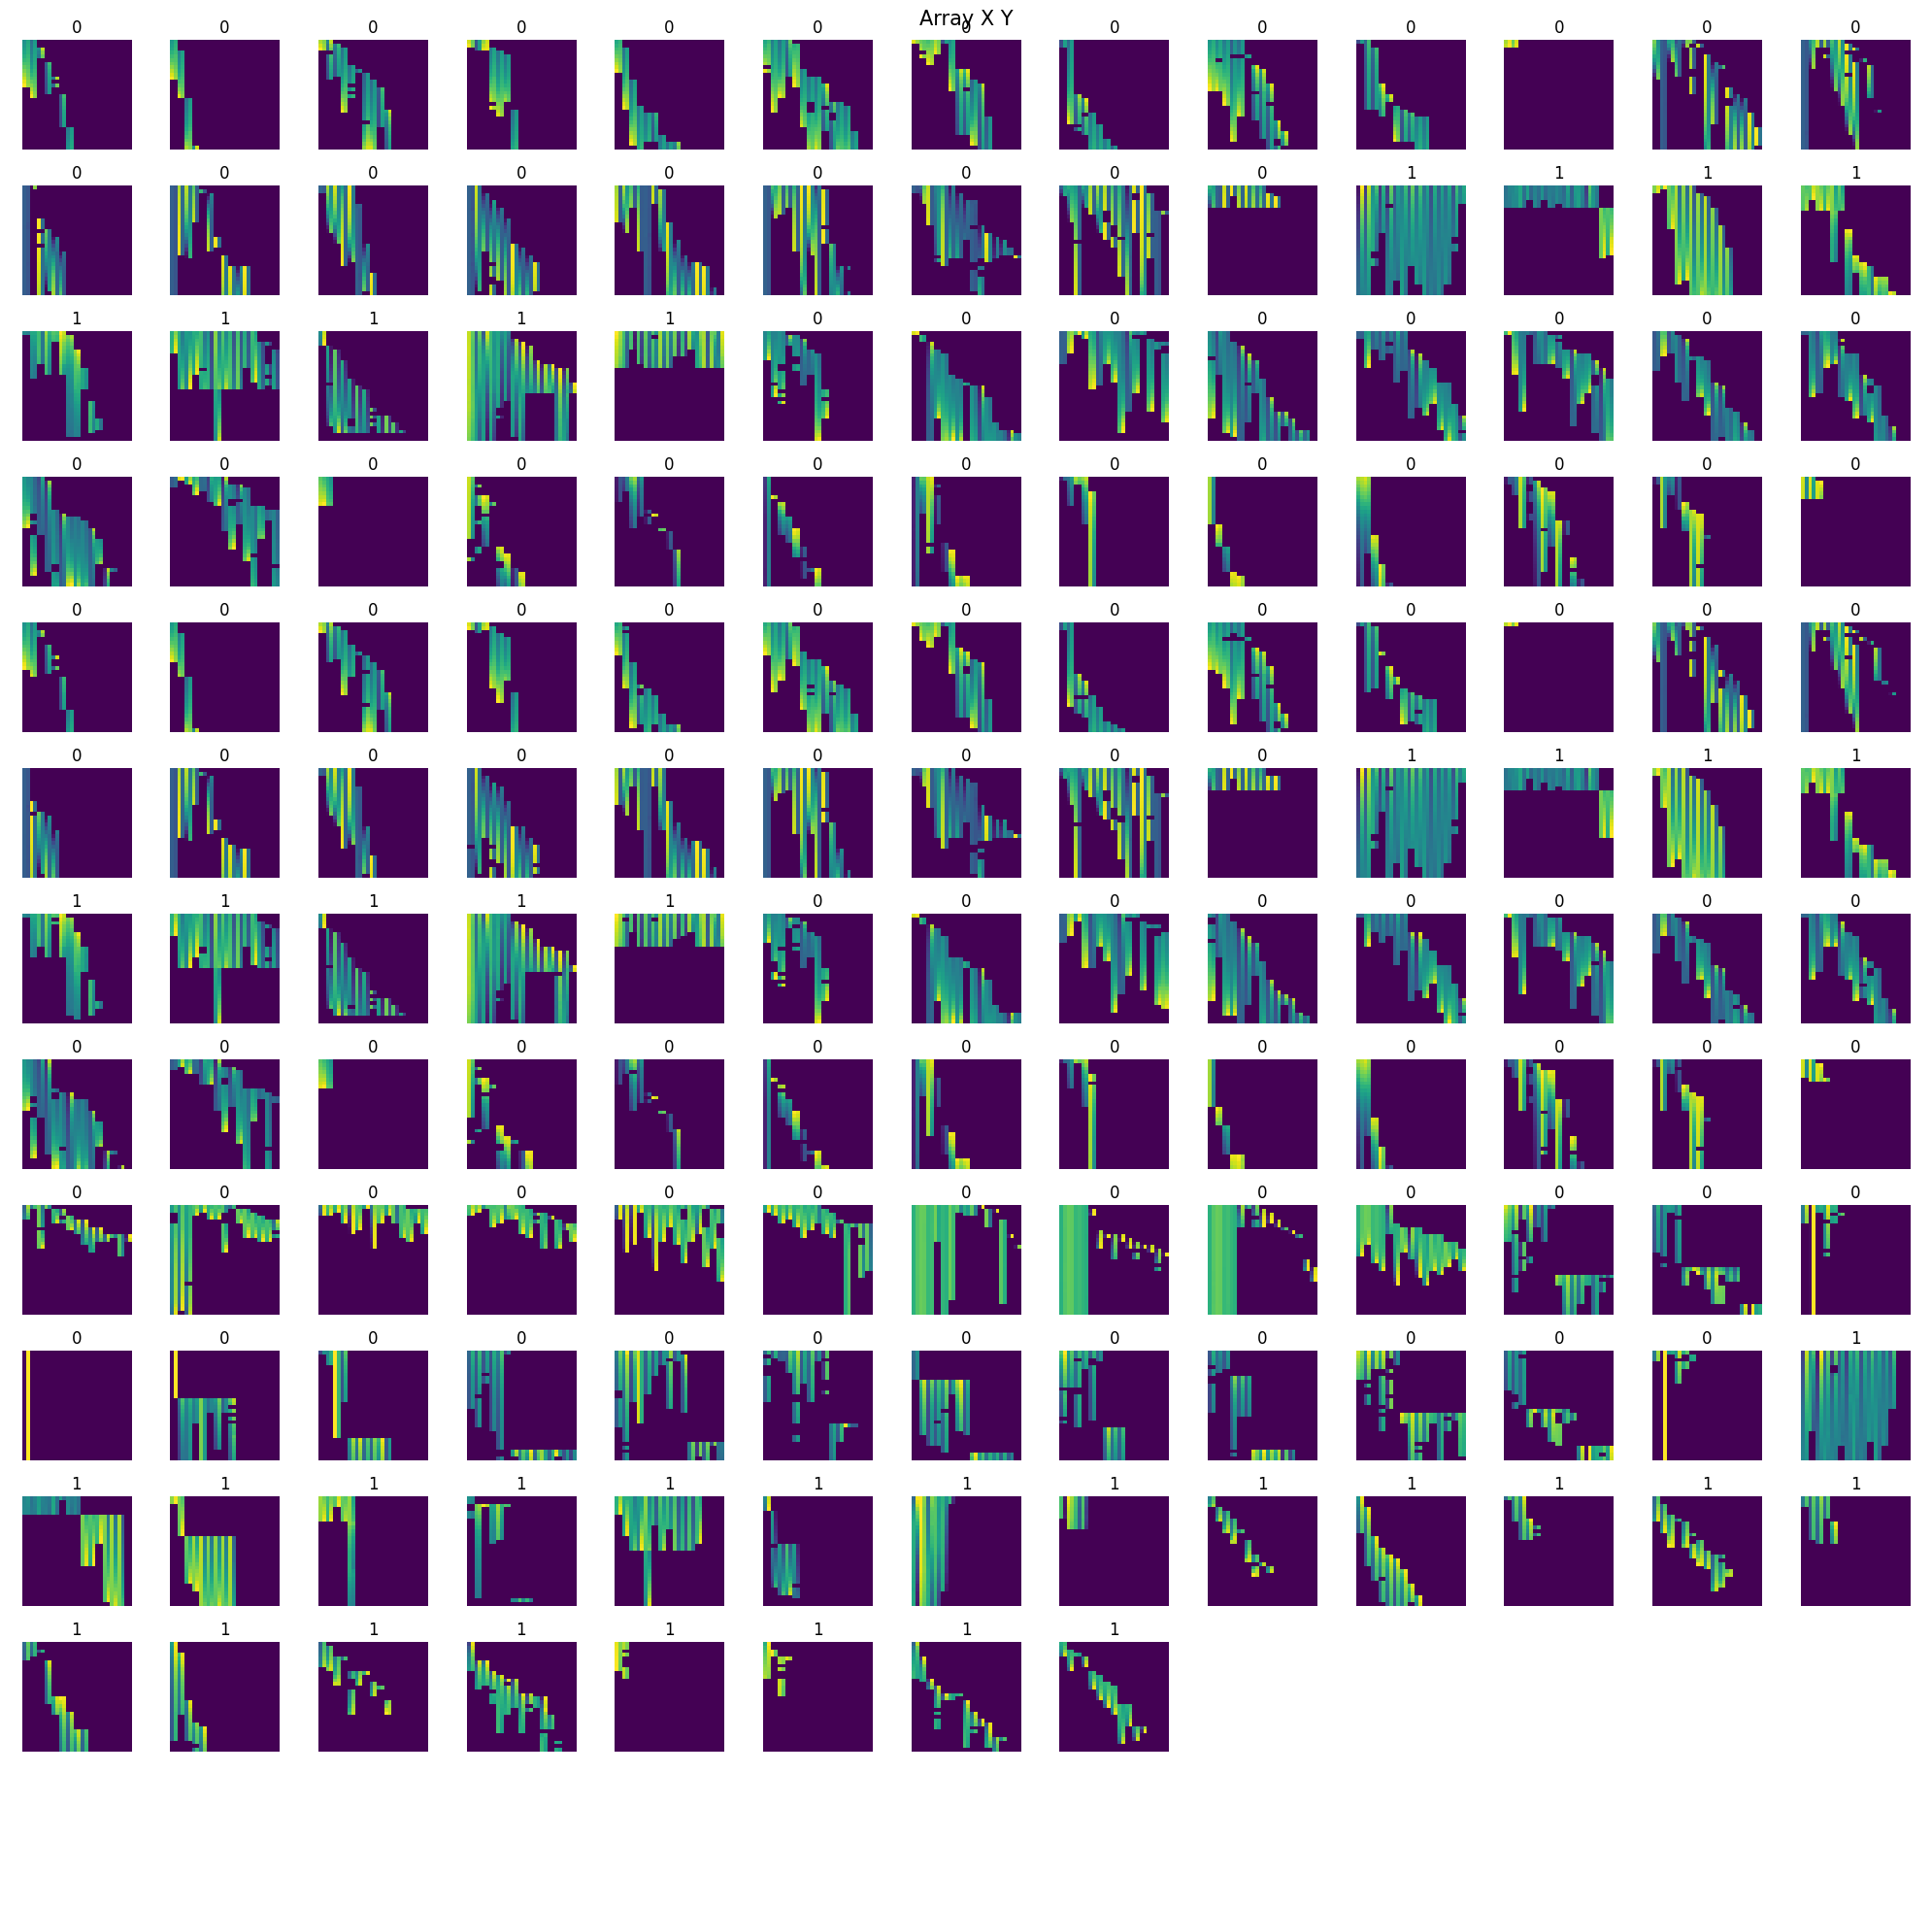

In [33]:
visualizeArray(X, y, size=(20, 20))